In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import datetime
import re
from os import listdir
import sys
sys.path.insert(0, '../Summaries')
import plotting_functions_SEHEC
from arb_functions import *
from helper_functions import *
from behaviour_analyses_SEHEC import *
from environment_functions import *

save_dirs = ['/nfs/nhome/live/lhollingsworth/Documents/EHC_model_comparison/sehec/models/Summaries/']

date = '2022-09-07'
run = '0'

recent = -1
data, para, list_of_files, save_path = plotting_functions_SEHEC.get_data(save_dirs, run, date, recent)

A_RNN, x_all, g_all, p_all, p_gen_all, acc_s_t_to, acc_s_t_from, positions, timeseries = data
params, widths, batch_id, g_size, p_size, s_size, s_size_comp, n_freq, width, states = para
print(params['world_type'])

mult = 4 if params['world_type'] == 'tonegawa' else 4  # upsample
smoothing = 1
cmap = 'jet'
maxmin=True

import seaborn
seaborn.set_style(style='white')
seaborn.set_style({'axes.spines.bottom': False,'axes.spines.left': False,'axes.spines.right': \
                   False,'axes.spines.top': False})

masks, g_lim, p_lim = plotting_functions_SEHEC.sort_data(g_all, p_all, widths, mult, smoothing, params, batch_id, \
                                         g_max_0=False, p_max_0=True)

yes/nfs/nhome/live/lhollingsworth/Documents/EHC_model_comparison/sehec/models/Summaries/2022-09-06/run11/save
29315 15
732875
no p_timeseries
square


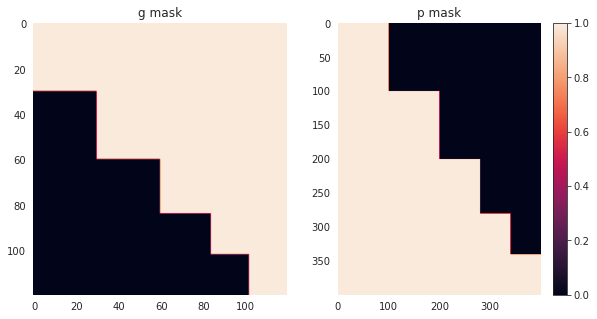

In [15]:
separate = [[1, 0, 0, 0, 0, 0],
                [0, 1, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0],
                [0, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 1, 0],
                [0, 0, 0, 0, 0, 1]]

hierarchical = [[1, 1, 1, 1, 1, 1],
                [0, 1, 1, 1, 1, 1],
                [0, 0, 1, 1, 1, 1],
                [0, 0, 0, 1, 1, 1],
                [0, 0, 0, 0, 1, 1],
                [0, 0, 0, 0, 0, 1]]

hierarchical_t = [[1, 0, 0, 0, 0, 0],
                    [1, 1, 0, 0, 0, 0],
                    [1, 1, 1, 0, 0, 0],
                    [1, 1, 1, 1, 0, 0],
                    [1, 1, 1, 1, 1, 0],
                    [1, 1, 1, 1, 1, 1]]

all2all = [[1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1]]

params['R_f_F'] = cp.deepcopy(hierarchical_t)
params['R_f_F_inv'] = cp.deepcopy(all2all)
params['R_G_F_f'] = cp.deepcopy(hierarchical)

g_mask = grid_mask(params['n_grids_all'], params['R_G_F_f'])
p_mask = place_mask(params['n_phases_all'], params['s_size_comp'], params['R_f_F'])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(g_mask, aspect='auto')
plt.title("g mask")
plt.subplot(1,2,2)
plt.imshow(p_mask, aspect='auto')
plt.title("p mask")
plt.colorbar()

plt.show()

In [7]:
for env in range(params['n_envs_save']):
    print('env', env)
    if shinys_[env] is not None:
        for shiny in shinys_[env]:
            try:
                print('acc to ' + str(shiny), acc_s_t_to[env][shiny])
                print('acc from ' + str(shiny), acc_s_t_from[env][shiny])
            except IndexError:
                pass

env 0


NameError: name 'shinys_' is not defined

In [61]:
for env in range(params['n_envs_save']):
    num_correct = np.sum(acc_s_t_to[env] * positions[env])
    proportion = num_correct / sum(positions[env])
    approx_num = proportion * np.sum(positions[env] > 0.1)
    print(env, '   Approx proportion : ', np.round(proportion, decimals=3), \
          '   Approx num : ', np.round(approx_num, decimals=2))

0    Approx proportion :  0.429    Approx num :  42.91
1    Approx proportion :  0.421    Approx num :  42.08
2    Approx proportion :  0.436    Approx num :  52.76
3    Approx proportion :  0.397    Approx num :  48.08
4    Approx proportion :  0.442    Approx num :  28.31
5    Approx proportion :  0.462    Approx num :  37.41


In [3]:
env0 = 1
env1 = 2
env2 = 3
env3 = 4

In [51]:
# GRAPHS
import networkx as nx
try:
    plt.figure(figsize=(10,5))
    for i, env in enumerate([env0, env1]):
        adj_ = remove_zero_adj(adj[env])
        
        plt.subplot(1,2,i + 1)
        g = nx.from_numpy_matrix(adj_)
        pos_nodes = nx.spring_layout(g, iterations=500)
        nx.draw(g, pos=pos_nodes, node_size=50, with_labels=True)
    
    plt.show()
except TypeError:
    plt.close('all')
    pass

NameError: name 'adj' is not defined

<Figure size 720x360 with 0 Axes>

In [64]:
# AGENT COVERAGE

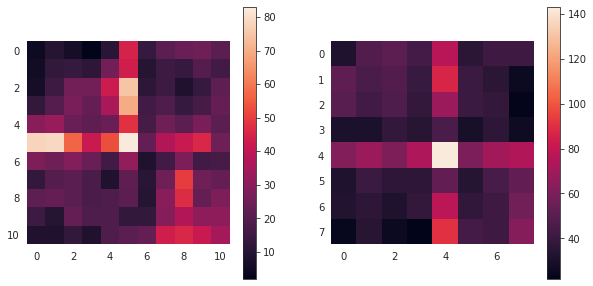

7.001 2.001


In [8]:
plt.figure(figsize=(10,5))
for i, env in enumerate([env2, env3]):
    plt.subplot(1,2,i+1)
    cell_reshaped = reshape_cells(positions[env], widths[batch_id[env]], params['world_type'])
    plt.imshow(cell_reshaped)
    plt.colorbar()

plt.show()

print(min(positions[env0]), min(positions[env1]))

In [77]:
print(np.reshape(positions[env0], (10, 10)))
print(sum(positions[env0]))

[[44.001 41.001 34.001 24.001 41.001 14.001 14.001  8.001  5.001  1.001]
 [43.001 40.001 35.001 27.001 38.001 16.001 15.001 11.001  8.001  9.001]
 [48.001 41.001 30.001 27.001 39.001 14.001 10.001 20.001 11.001 15.001]
 [56.001 53.001 43.001 35.001 46.001 19.001 23.001 30.001 19.001 29.001]
 [64.001 67.001 59.001 49.001 74.001 26.001 33.001 38.001 35.001 38.001]
 [27.001 21.001 21.001 16.001 63.001 23.001 30.001 34.001 27.001 29.001]
 [17.001 17.001 16.001 21.001 66.001 32.001 34.001 36.001 26.001 30.001]
 [17.001 13.001 13.001 25.001 58.001 27.001 43.001 48.001 31.001 34.001]
 [17.001 15.001 13.001 12.001 39.001 29.001 31.001 42.001 35.001 42.001]
 [22.001 10.001  7.001 11.001 32.001 25.001 27.001 43.001 56.001 63.001]]
3025.100000000006


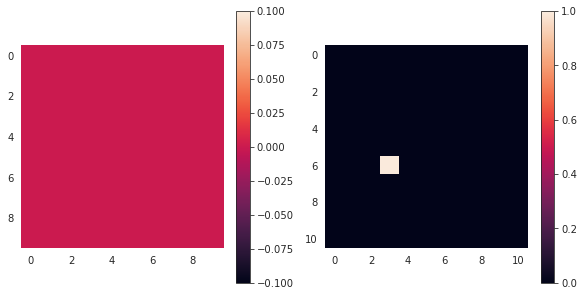

In [18]:
# where the agent didnt go much shown in black
plt.figure(figsize=(10,5))

for i, env in enumerate([env0, env1]):
    a = positions[env] < 4
    plt.subplot(1,2,i+1)
    cell_reshaped = reshape_cells(a.astype(int), widths[batch_id[env]], params['world_type'])
    plt.imshow(cell_reshaped)
    plt.colorbar()    
    
plt.show()

In [ ]:
# ACCURACY MAPS - SENSORY

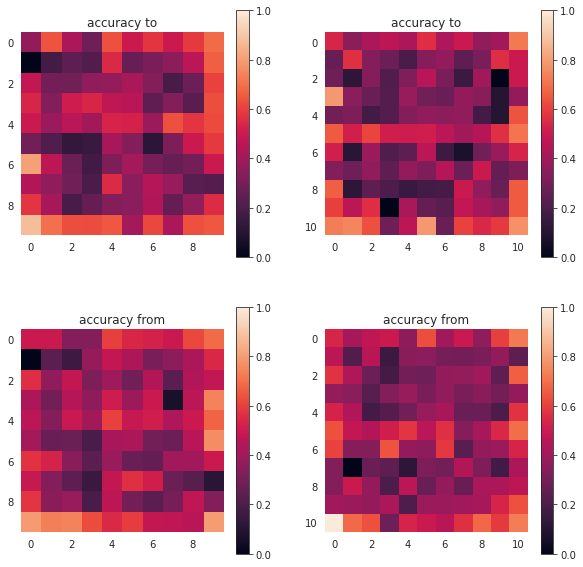

In [21]:
plt.figure(figsize=(10,10))
for i, env in enumerate([env0, env1]):
    plt.subplot(2,2,i+1)
    cell_reshaped = reshape_cells(acc_s_t_to[env], widths[batch_id[env]], params['world_type'])
    plt.imshow(cell_reshaped,vmax=1,vmin=0)
    plt.title('accuracy to')

    plt.colorbar()
    plt.subplot(2,2,i+3)
    cell_reshaped = reshape_cells(acc_s_t_from[env], widths[batch_id[env]], params['world_type'])
    plt.imshow(cell_reshaped,vmax=1,vmin=0)
    plt.title('accuracy from')

    plt.colorbar()

plt.show()

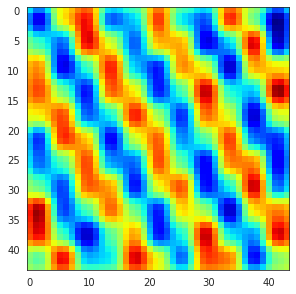

In [14]:
# PLOT SINGLE GRID 

single_plot(g_all[env1], widths[batch_id[env1]], choice=36, maxmin=maxmin, shiny=None, \
            hexy=params['world_type'], lims=g_lim, mult=mult, smoothing=smoothing, cmap=cmap, mask=masks[env1])

/nfs/nhome/live/lhollingsworth/Documents/Thesis/Plotting Code/plotting_functions.py:151: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(wid0, wid1, grid + 1)


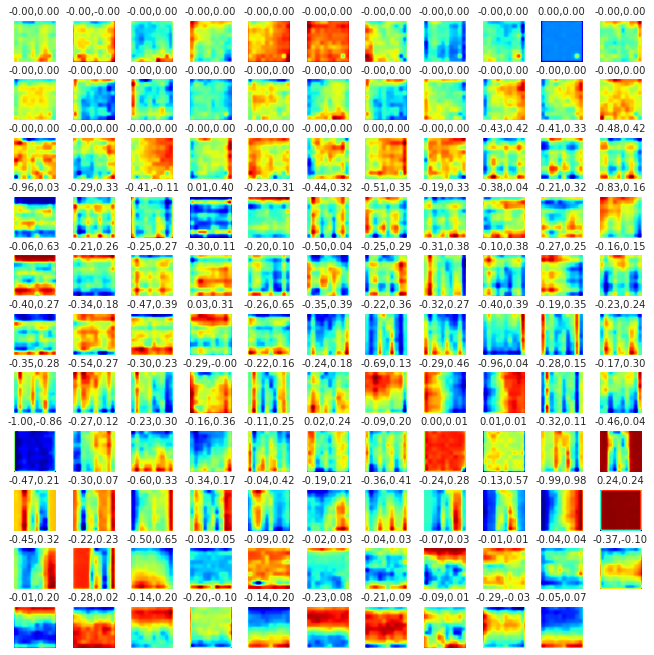

In [9]:
# ENTORHINAL CELLS 
square_plot(g_all[env0], widths[batch_id[env0]], name='g0', maxmin=maxmin, shiny=None, \
            hexy=params['world_type'], lims=g_lim, mult=mult, smoothing=smoothing, cmap=cmap, mask=masks[env0])

/nfs/nhome/live/lhollingsworth/Documents/Thesis/Plotting Code/plotting_functions.py:151: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(wid0, wid1, grid + 1)


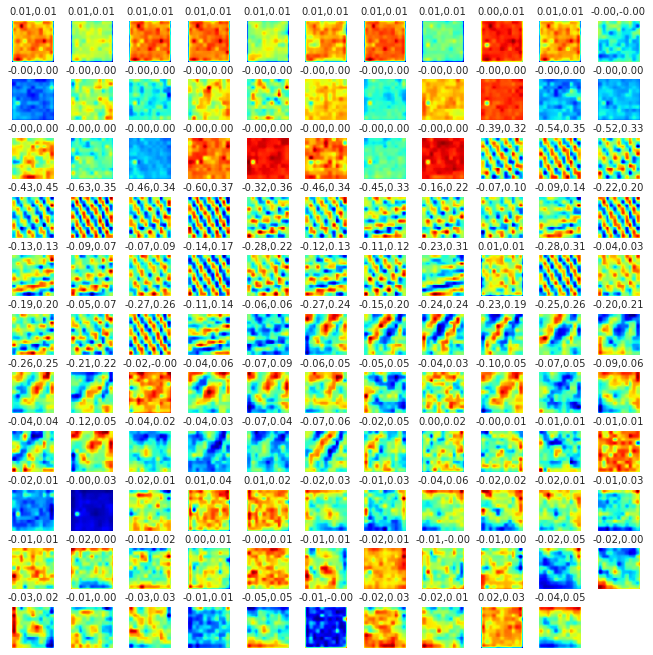

In [5]:
square_plot(g_all[env1], widths[batch_id[env1]], name='g1', maxmin=maxmin, shiny=None, \
            hexy=params['world_type'], lims=g_lim, mult=mult, smoothing=smoothing, cmap=cmap, mask=masks[env1])

In [ ]:
# ENTORHINAL AUTOCORRELATIONS

/nfs/nhome/live/lhollingsworth/Documents/Thesis/Plotting Code/plotting_functions.py:202: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(wid, wid, grid + 1)


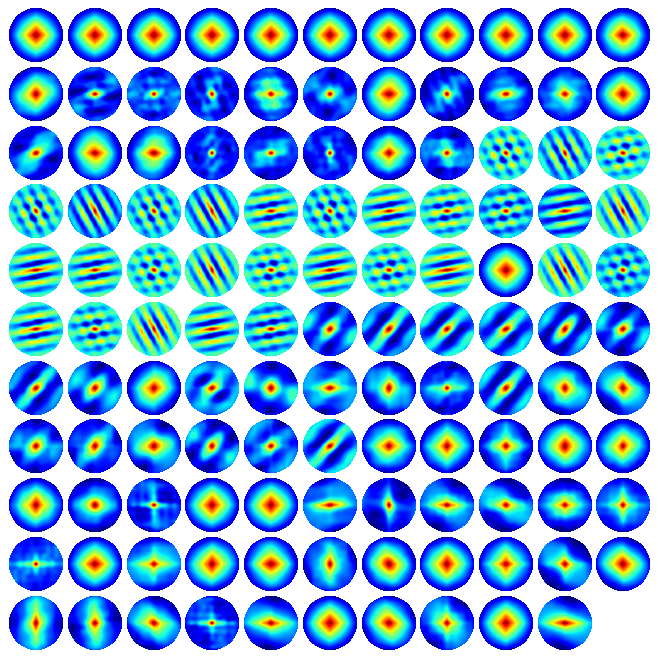

In [6]:
square_autocorr_plot(g_all[env3], widths[batch_id[env3]], name='g0_auto', \
                     hexy=params['world_type'], mult=mult, smoothing=smoothing, cmap=cmap, circle=True)

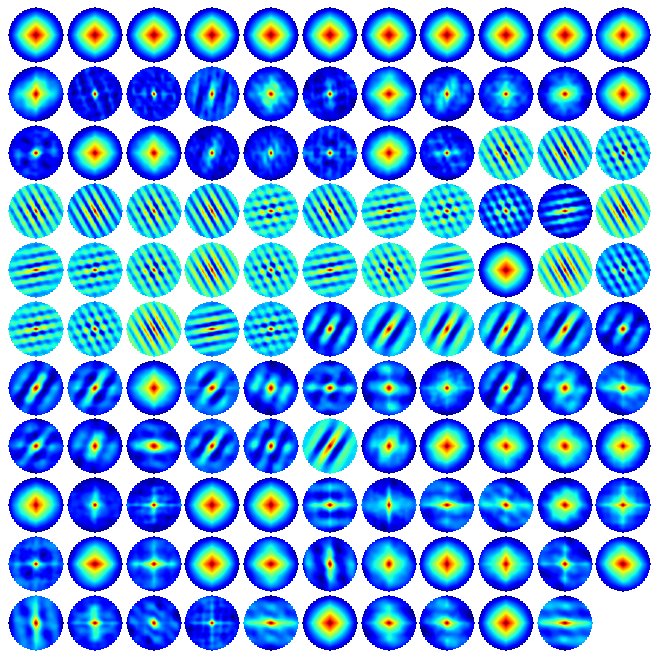

In [7]:
square_autocorr_plot(g_all[env1], widths[batch_id[env1]], name='g1_auto', \
                     hexy=params['world_type'], mult=mult, smoothing=smoothing, cmap=cmap, circle=True)

In [ ]:
# HIPPOCAMPAL CELLS

/nfs/nhome/live/lhollingsworth/Documents/Thesis/Plotting Code/plotting_functions.py:151: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(wid0, wid1, grid + 1)


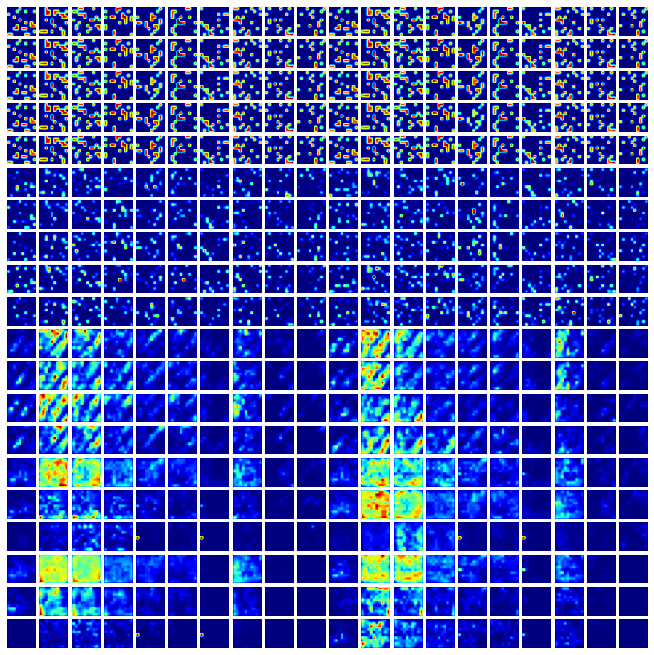

In [8]:
square_plot(p_all[env0],widths[batch_id[env0]], name='p0', shiny=None,\
            hexy=params['world_type'], lims=p_lim, mult=mult, smoothing=smoothing, cmap=cmap, mask=masks[env0])

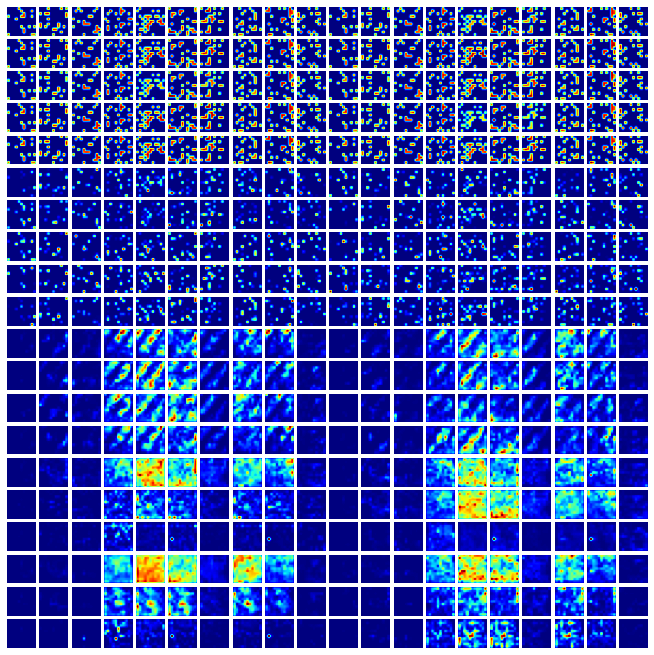

In [9]:
square_plot(p_all[env1],widths[batch_id[env1]], name='p1', shiny=None, \
            hexy=params['world_type'], lims=p_lim, mult=mult, smoothing=smoothing, cmap=cmap, mask=masks[env1])

In [10]:
"""
BEHAVIOURAL ANALYSES
"""

seaborn.set_style(style='white')

params['acc_simu'] = 1  # how accurate simulated node/edge agent is
recent = -1  # how far back into history of saved data
filt_size = 61  # smoothing window size (must be odd)
n = 10
fracs = [x /n for x in range(n+2)]  # for assessing accuracy within certain proportions of nodes visited

# for steps since visted analysis - assess accuracy within those steps
if params['world_type'] in ['family_tree', 'line_ti', 'tonegawa']:
    a_s = [0, 10, 20]
else:
    a_s = [0, 4, 10, 20, 40, 60, 100, 200, 300, 400, 600]

# Load data
positions_link, coos, env_info, distance_info = link_inferences(save_path, list_of_files, widths, batch_id, params,\
                                                                index=recent)
n_states, wids = env_info

n_available_states = np.zeros_like(wids)
n_available_edges = np.zeros_like(wids)

n_available_edgess = [460, 460, 561, 561, 288, 369, 460, 561, 288, 369, 460, 561, 288, 288, 369, 369]
n_available_statess = [100, 100, 121, 121, 64, 81, 100, 121, 64, 81, 100, 121, 64, 64, 81, 81]

for i in range(len(n_available_edgess)):
    n_available_edges[i] = n_available_edgess[i]

for i in range(len(n_available_statess)):
    n_available_states[i] = n_available_statess[i]


# Perform behavioural analayses. Partition results into environments of same size
allowed_widths = sorted(np.unique([widths[b_id] for b_id in batch_id]))
results = []
for allowed_wid in allowed_widths:
    p_cors, nodes_visited_all, edges_visited_all, time_vis_anal = \
        analyse_link_inference(allowed_wid, fracs, a_s, positions_link, coos, env_info, params, n_available_edges, n_available_states)
    p_cors = [ind for ind in p_cors if len(ind)>0]
    results.append([p_cors, nodes_visited_all, edges_visited_all, time_vis_anal])

IndexError: list index out of range

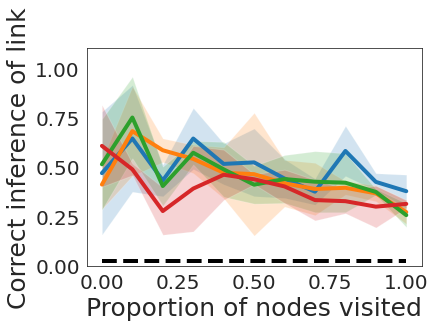

In [27]:
# inferernce of untraversed link as a function proportion on nodes seen
plot_link_inference(results, allowed_widths, fracs, s_size)

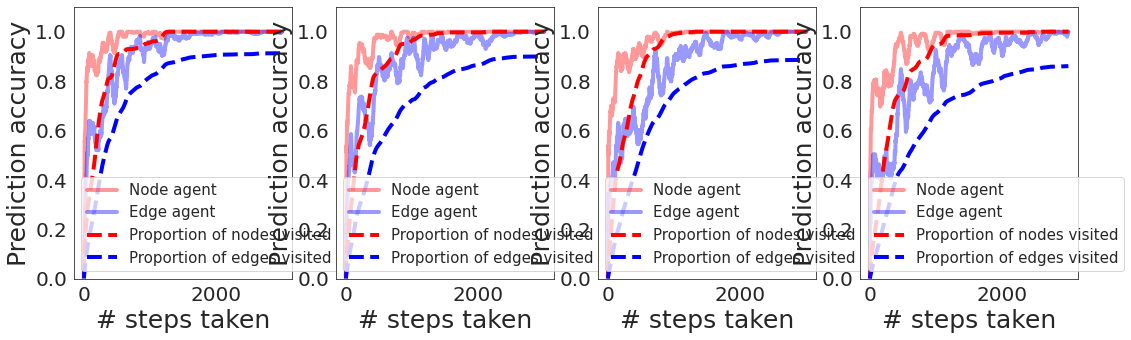

In [23]:
# simulation of node and edge agent
plot_sim_corrects(results, allowed_widths, filt_size, wids, n_available_states, n_available_edges, params)

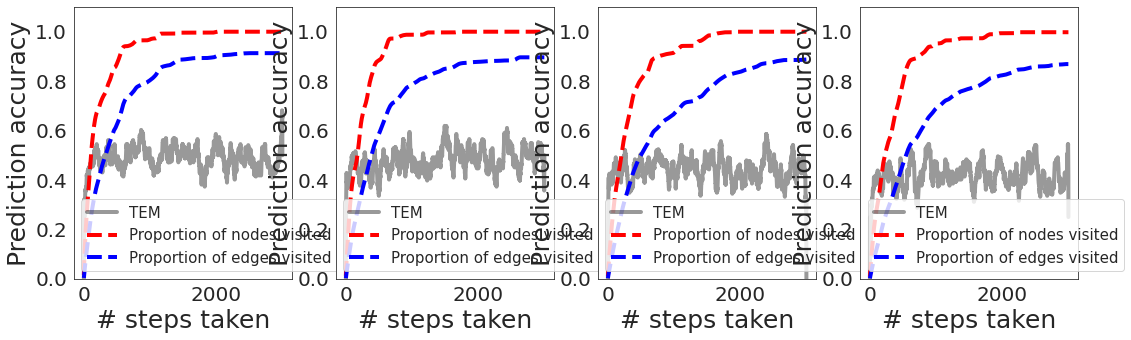

In [38]:
# tem accuracy for each environment size
plot_acc_vs_sum_nodes_edges(results, allowed_widths, coos, filt_size, wids, n_available_states, n_available_edges)

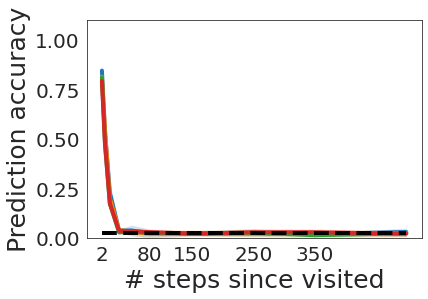

In [25]:
# prediction accuracy after # steps since last time visited that node
plot_acc_vs_steps_since_visited(results, allowed_widths, a_s, s_size)

In [ ]:
# HARLOW LIKE LEARNING CURVES

results_mega = []
coos_mega = []
allowed_widths = [9]
allowed_recents = [[1,2], [7, 8, 9] , [11, 12, 13, 14], [18, 19,20, 21], [-1]]  # for family_tree

#[[1,2], [7, 8, 9] , [11, 12, 13, 14], [18, 19,20, 21], [-3,-2,-1]]  # for family_tree
#[[1,2], [5, 6, 7, 8] , [9, 10, 11, 12, 13, 14], [50, 55, 60, 70], [-3,-2,-1]]  # for tran_inf

for hyper_recent in allowed_recents:
    results_ = []
    for recent in hyper_recent:

        positions_link, coos, env_info, distance_info = link_inferences(save_path, list_of_files, widths, batch_id, \
                                                                        params, index=recent)

        n_states, wids, n_available_states, n_available_edges = env_info

        #results_ = []
        for allowed_wid in allowed_widths:
            nodes_visited_all, edges_visited_all, n_visited_means = [], [], []
            for i in range(params['batch_size']):
                if wids[i] == allowed_wid:
                    params['states'] = n_states[i]
                    params['n_available_states'] = n_available_states[i]
                    params['edges'] = n_available_edges[i]

                    node_visited, edge_visited, nodes, edges, num_visited, edge_stay_still = \
                        check_visited(positions_link[i].astype(int), params)
                    # all new links, but visited nodes!
                    n_visited_means.append(n_visited_correct(coos[i], num_visited, edge_visited))

            results_.append([n_visited_means])
    results_mega.append(results_)
    coos_mega.append(coos)


In [ ]:
f = plt.figure()

n_visits_lim = 20

smallest_min = 10000
for i, recent in enumerate(allowed_recents):    
    for res, wid in zip(results_mega[i], allowed_widths):
        pc = res[0]
        pc, smallest = sort_out_summin(pc)
        smallest_min = np.minimum(smallest, smallest_min)
    
        mean_pc = np.nanmean(pc, 0)
        std_pc = sp.stats.sem(pc, 0, nan_policy='omit')
        plt.plot(mean_pc)
        plt.fill_between(np.arange(smallest), mean_pc + std_pc, mean_pc - std_pc,
                         alpha=0.2, label=str(recent))

smallest_min = np.minimum(smallest_min, n_visits_lim)
plt.plot((0, smallest_min-1), (1/s_size, 1/s_size), 'k--', linewidth=linewidth)
plt.xlim(0, smallest_min-1)
plt.ylim(0, 1.1)
plt.tick_params(axis='both', which='major', labelsize=labelsize)
plt.tick_params(axis='both', which='minor', labelsize=labelsize)
plt.xlabel('# times node visited', fontsize=fontsize)
plt.ylabel('Correct inference of link', fontsize=fontsize)
plt.legend()
plt.show()